In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

SEED = 123456
import os
import random as rn
import tensorflow as tf

tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df = pd.read_csv('wrangled_data.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Class,audio_name,zcr,fifth_x,fifth_y,minor_x,minor_y,major_x,...,spectral_contrast_5,spectral_contrast_6,spectral_contrast_7,spectral_contrast_8,spectral_contrast_9,spectral_contrast_10,spectral_contrast_11,spectral_centroid,spectral_rolloff,spectral_badwidth
0,0,0,siren,Data/Train/0.wav,0.086474,-0.003187,0.005104,-0.036059,-0.029152,-0.007110,...,0.848354,0.867237,0.824010,0.809022,0.771044,0.768117,0.795893,1748.212594,3301.239190,1960.840273
1,1,1,street_music,Data/Train/1.wav,0.092812,0.017138,0.068678,-0.129724,0.006874,0.014045,...,0.691402,0.489214,0.494191,0.543142,0.809993,0.784600,0.608434,1976.408248,4178.935039,2124.078096
2,2,2,drilling,Data/Train/2.wav,0.350884,-0.002267,-0.006454,0.014939,0.049996,-0.015761,...,0.689884,0.602324,0.712485,0.874134,0.862012,0.773346,0.779085,4384.298361,8018.628776,2835.271222
3,3,3,siren,Data/Train/3.wav,0.108810,-0.141602,-0.280224,-0.244523,-0.023330,0.210154,...,0.118245,0.225149,0.324359,0.179027,0.123862,0.125823,0.151150,1893.168277,3441.889592,1608.244124
4,4,4,dog_bark,Data/Train/4.wav,0.026372,-0.012800,0.000354,0.005635,-0.062591,0.015265,...,0.695100,0.741774,0.790124,0.696284,0.711091,0.724801,0.721177,1109.442828,2283.079643,1941.468084


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 185 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Class                 object 
 2   audio_name            object 
 3   zcr                   float64
 4   fifth_x               float64
 5   fifth_y               float64
 6   minor_x               float64
 7   minor_y               float64
 8   major_x               float64
 9   major_y               float64
 10  melspectrogram_0      float64
 11  melspectrogram_1      float64
 12  melspectrogram_2      float64
 13  melspectrogram_3      float64
 14  melspectrogram_4      float64
 15  melspectrogram_5      float64
 16  melspectrogram_6      float64
 17  melspectrogram_7      float64
 18  melspectrogram_8      float64
 19  melspectrogram_9      float64
 20  melspectrogram_10     float64
 21  melspectrogram_11     float64
 22  melspectrogram_12     float64
 23  melspectrogr

In [5]:
y=pd.get_dummies(df.Class)
X=df.drop(columns=['Class','ID','audio_name'])
X_col = X.columns

# Pre_processing

We need to standarize our features to be within the same scale:

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(X)
pd.DataFrame(data, columns=X_col)

,zcr,fifth_x,fifth_y,minor_x,minor_y,major_x,major_y,melspectrogram_0,melspectrogram_1,melspectrogram_2,...,spectral_contrast_5,spectral_contrast_6,spectral_contrast_7,spectral_contrast_8,spectral_contrast_9,spectral_contrast_10,spectral_contrast_11,spectral_centroid,spectral_rolloff,spectral_badwidth
0,-0.363422,-0.033624,0.010211,-0.371676,-0.342962,-0.196887,0.747596,-0.110964,0.028213,0.783914,...,1.092226,1.183834,0.923527,0.797700,0.517001,0.495308,0.622163,-0.331060,-0.360135,-0.162786
1,-0.293258,0.252986,0.899219,-1.353758,0.056649,0.368190,0.003829,-0.154614,-0.150467,-0.032085,...,0.163446,-1.058814,-1.063313,-0.816209,0.740207,0.587272,-0.436657,-0.101823,0.085531,0.115738
2,2.563751,-0.020652,-0.151410,0.163036,0.534988,-0.427959,-0.322039,-0.182925,-0.217805,-0.239538,...,0.154463,-0.387777,0.251696,1.192935,1.038314,0.524482,0.527226,2.317056,2.035203,1.329207
3,-0.116154,-1.985471,-3.979748,-2.557421,-0.278379,5.606583,-3.617635,-0.180901,-0.215115,-0.236535,...,-3.228274,-2.625398,-2.086382,-3.026409,-3.191816,-3.088255,-3.019529,-0.185443,-0.288717,-0.764401
4,-1.028786,-0.169179,-0.056207,0.065484,-0.713891,0.400783,-0.302832,0.965934,0.033769,0.033249,...,0.185327,0.439517,0.719394,0.113372,0.173426,0.253635,0.200146,-0.972745,-0.877123,-0.195839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,-0.946070,-0.330656,-3.452595,0.698074,-3.201785,1.817197,2.203585,-0.151118,-0.112918,0.248861,...,-0.142699,0.679330,0.717408,-0.418892,-0.039723,1.356734,0.488231,-1.236384,-1.264295,-1.195967
5429,-0.389183,-0.287224,0.577682,-0.246753,0.499603,0.892868,0.211097,-0.183133,-0.218682,-0.240519,...,-0.016033,0.109268,0.327858,0.681858,0.768213,0.953016,0.376381,-0.045205,0.268598,0.581922
5430,1.172274,0.490005,0.435396,0.596281,2.762105,-2.255961,0.053945,-0.183205,-0.216195,-0.236275,...,0.484563,0.282291,0.161224,0.173818,0.322635,0.287371,0.491813,1.818314,2.027650,1.952959
5431,-0.887454,-2.897597,-0.482077,-0.452371,3.215969,-2.887141,-1.119204,-0.149964,-0.026976,-0.162446,...,0.791604,0.550592,0.890472,1.244599,1.312868,1.048491,0.808948,-0.631867,-0.466060,-0.326234


In [7]:
data = pd.concat([df.Class,pd.DataFrame(data, columns=X_col)],axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.copy(), y, test_size=0.25, random_state=42)
class_train = X_train.Class
class_test = X_test.Class
X_train.drop(columns='Class',inplace=True)
X_test.drop(columns='Class',inplace=True)

# Modeling


Now, we can create our Neural Network:

In [9]:
model = Sequential()

model.add(Dense(182, input_shape=(X_train.shape[1],), activation = 'relu'))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(len(y.columns), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp4cwdwtpb.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp4cwdwtpb.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
128/128 [==============================] - 11s 5ms/step - loss: 2.1836 - accuracy: 0.2449 - val_loss: 1.4070 - val_accuracy: 0.5717
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 1.4867 - accuracy: 0.5161 - val_loss: 1.0057 - val_accuracy: 0.6792
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 1.1401 - accuracy: 0.6218 - val_lo

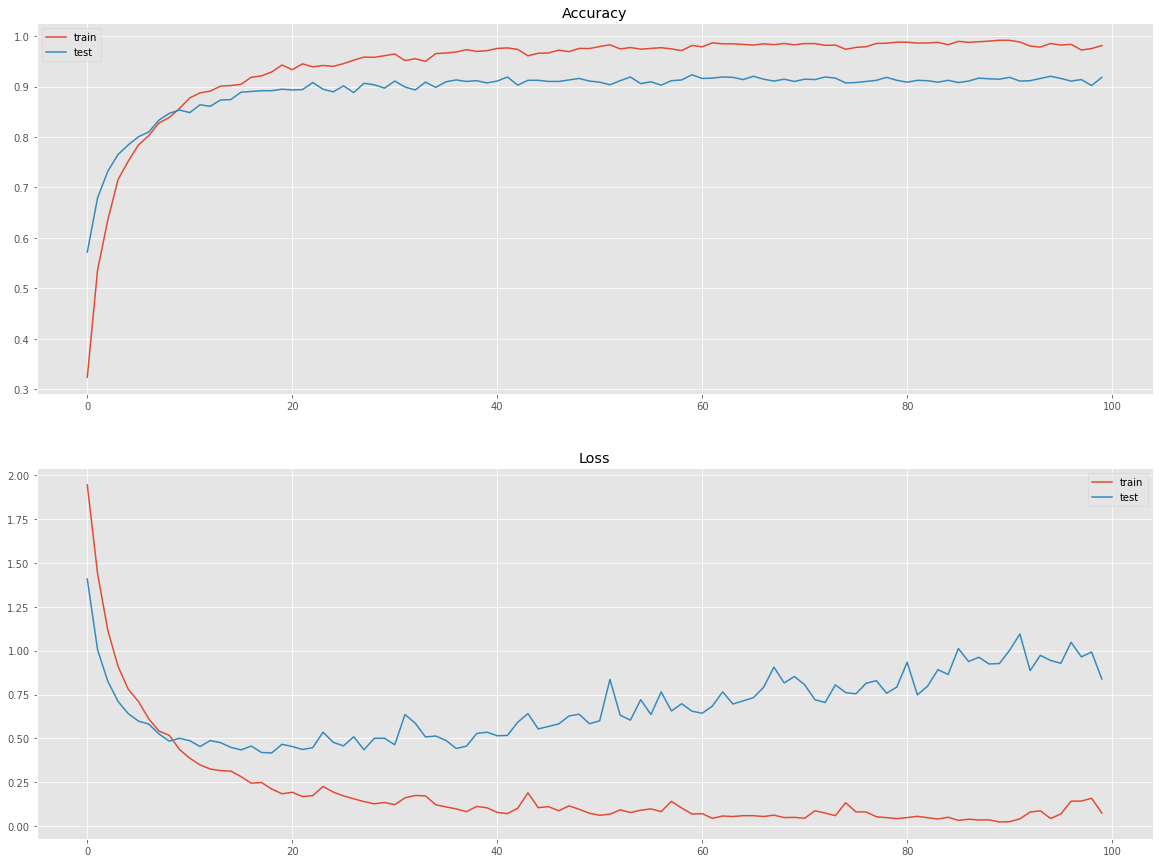

In [10]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))#, callbacks=[es])
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.subplot(212)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show() 

In [11]:
predict = model.predict_classes(X_test)

c:\users\ronal\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
from sklearn.metrics import classification_report

In [13]:
labels = y.columns
prediction= list()
for i in predict:
    prediction.append(labels[i])

In [14]:
k=0
for i, j in zip(class_test,prediction):
    if i==j:
        k=k+1
print(f'Accuracy on test data: {round(k/len(prediction)*100,2)}%')

Accuracy on test data: 91.83%


Right away we get very good accuracy. However, let's see if we can improve it using Autokeras:

In [15]:
from autokeras import StructuredDataClassifier
search = StructuredDataClassifier(max_trials=15)
# perform the search
search.fit(x=X_train, y=y_train, verbose=1)

loss, acc = search.evaluate(X_test, y_test, verbose=1)

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
128/128 [==============================] - 2s 3ms/step - loss: 1.4412 - accuracy: 0.5298
Epoch 2/20
128/128 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.8230
Epoch 3/20
128/128 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8981
Epoch 4/20
128/128 [==============================] - 0s 3ms/step - loss: 0.3003 - accuracy: 0.9146
Epoch 5/20
128/128 [==============================] - 0s 3ms/step - loss: 0.1779 - accuracy: 0.9528
Epoch 6/20
128/128 [==============================] - 0s 3ms/step - loss: 0.1427 - accuracy: 0.9580
Epoch 7/20
128/128 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9686
Epoch 8/20
128/128 [==============================] - 0s 3ms/step - loss: 0.0689 - accur

In [16]:
model = search.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 182)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 182)               0         
_________________________________________________________________
normalization (Normalization (None, 182)               365       
_________________________________________________________________
dense (Dense)                (None, 512)               93696     
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0     

In [17]:
autopredict = model.predict(X_test)
autoprediction= list()
for i in autopredict:
    autoprediction.append(labels[i.argmax()])
k=0
for i, j in zip(class_test,autoprediction):
    if i==j:
        k=k+1
print(f'Accuracy on test data: {round(k/len(autoprediction)*100,2)}%')

Accuracy on test data: 90.8%


Our model didn't improve at all. 

Now, let's take care of the imbalanced classes in out dataset by upsampling them:

# Balancing the data

We'll upsample the classes `car_horn` and `gun_shot`:

In [18]:
from sklearn.utils import resample

In [19]:
# Separate majority and minority classes
df_car_majority = data[data.Class!='car_horn']
df_minority = data[data.Class=='car_horn']
 
# Upsample minority class
df_car_horn_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=600,    # to match majority class
                                 random_state=123) # reproducible results
 


In [20]:
# Separate majority and minority classes
df_gun_majority = data[data.Class!='gun_shot']
df_minority = data[data.Class=='gun_shot']
 
# Upsample minority class
df_gun_shot_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=600,    # to match majority class
                                 random_state=123)

<AxesSubplot:>

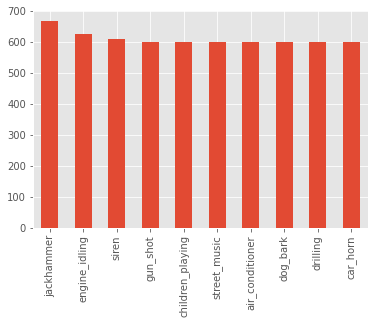

In [21]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([data[(data.Class!='car_horn')&(data.Class!='gun_shot')], df_car_horn_upsampled, df_gun_shot_upsampled])
 
# Display new class counts
df_upsampled.Class.value_counts().plot(kind='bar')

In [22]:
df_upsampled

,Class,zcr,fifth_x,fifth_y,minor_x,minor_y,major_x,major_y,melspectrogram_0,melspectrogram_1,...,spectral_contrast_5,spectral_contrast_6,spectral_contrast_7,spectral_contrast_8,spectral_contrast_9,spectral_contrast_10,spectral_contrast_11,spectral_centroid,spectral_rolloff,spectral_badwidth
0,siren,-0.363422,-0.033624,0.010211,-0.371676,-0.342962,-0.196887,0.747596,-0.110964,0.028213,...,1.092226,1.183834,0.923527,0.797700,0.517001,0.495308,0.622163,-0.331060,-0.360135,-0.162786
1,street_music,-0.293258,0.252986,0.899219,-1.353758,0.056649,0.368190,0.003829,-0.154614,-0.150467,...,0.163446,-1.058814,-1.063313,-0.816209,0.740207,0.587272,-0.436657,-0.101823,0.085531,0.115738
2,drilling,2.563751,-0.020652,-0.151410,0.163036,0.534988,-0.427959,-0.322039,-0.182925,-0.217805,...,0.154463,-0.387777,0.251696,1.192935,1.038314,0.524482,0.527226,2.317056,2.035203,1.329207
3,siren,-0.116154,-1.985471,-3.979748,-2.557421,-0.278379,5.606583,-3.617635,-0.180901,-0.215115,...,-3.228274,-2.625398,-2.086382,-3.026409,-3.191816,-3.088255,-3.019529,-0.185443,-0.288717,-0.764401
4,dog_bark,-1.028786,-0.169179,-0.056207,0.065484,-0.713891,0.400783,-0.302832,0.965934,0.033769,...,0.185327,0.439517,0.719394,0.113372,0.173426,0.253635,0.200146,-0.972745,-0.877123,-0.195839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,gun_shot,0.913283,-0.168265,0.382039,-0.338778,0.496731,-0.052703,0.571411,-0.086129,-0.175903,...,0.537716,0.649540,0.948394,1.059501,0.967522,1.066379,1.224871,1.243212,1.431225,1.399243
746,gun_shot,0.493850,-0.085400,0.108928,-0.342978,0.086862,0.219105,-0.088102,-0.158192,-0.204699,...,0.744934,0.935272,0.976520,0.940784,0.905677,1.086381,1.169456,1.142324,1.415156,1.447937
482,gun_shot,-0.248061,-0.250695,-0.558233,-1.012349,-0.106370,0.223279,-0.477221,-0.172981,-0.185959,...,0.822525,0.650265,0.738657,0.608956,0.597441,0.379174,0.702259,-0.903440,-1.045407,-1.891770
532,gun_shot,0.612574,0.266750,-0.187195,0.553202,-0.176233,0.197083,0.389083,-0.042791,-0.134414,...,0.399033,1.051031,1.059535,0.693625,1.048906,0.804443,1.150610,0.679640,0.739437,0.933270


## Re-runnign the model with balanced data

In [23]:
y_upsampled=pd.get_dummies(df_upsampled.Class)
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.copy(), y_upsampled, test_size=0.25, random_state=42)
class_train = X_train.Class
class_test = X_test.Class
X_train.drop(columns='Class',inplace=True)
X_test.drop(columns='Class',inplace=True)

In [24]:
model = Sequential()

model.add(Dense(182, input_shape=(X_train.shape[1],), activation = 'relu'))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(len(y.columns), activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))#, callbacks=[es])

Epoch 1/100
143/143 [==============================] - 1s 4ms/step - loss: 2.1441 - accuracy: 0.2535 - val_loss: 1.1768 - val_accuracy: 0.6525
Epoch 2/100
143/143 [==============================] - 0s 2ms/step - loss: 1.3312 - accuracy: 0.5455 - val_loss: 0.8540 - val_accuracy: 0.7443
Epoch 3/100
143/143 [==============================] - 0s 2ms/step - loss: 1.0202 - accuracy: 0.6765 - val_loss: 0.7258 - val_accuracy: 0.7974
Epoch 4/100
143/143 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.7254 - val_loss: 0.6246 - val_accuracy: 0.8289
Epoch 5/100
143/143 [==============================] - 0s 2ms/step - loss: 0.7291 - accuracy: 0.7720 - val_loss: 0.5350 - val_accuracy: 0.8426
Epoch 6/100
143/143 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7978 - val_loss: 0.4827 - val_accuracy: 0.8577
Epoch 7/100
143/143 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8339 - val_loss: 0.4688 - val_accuracy: 0.8793

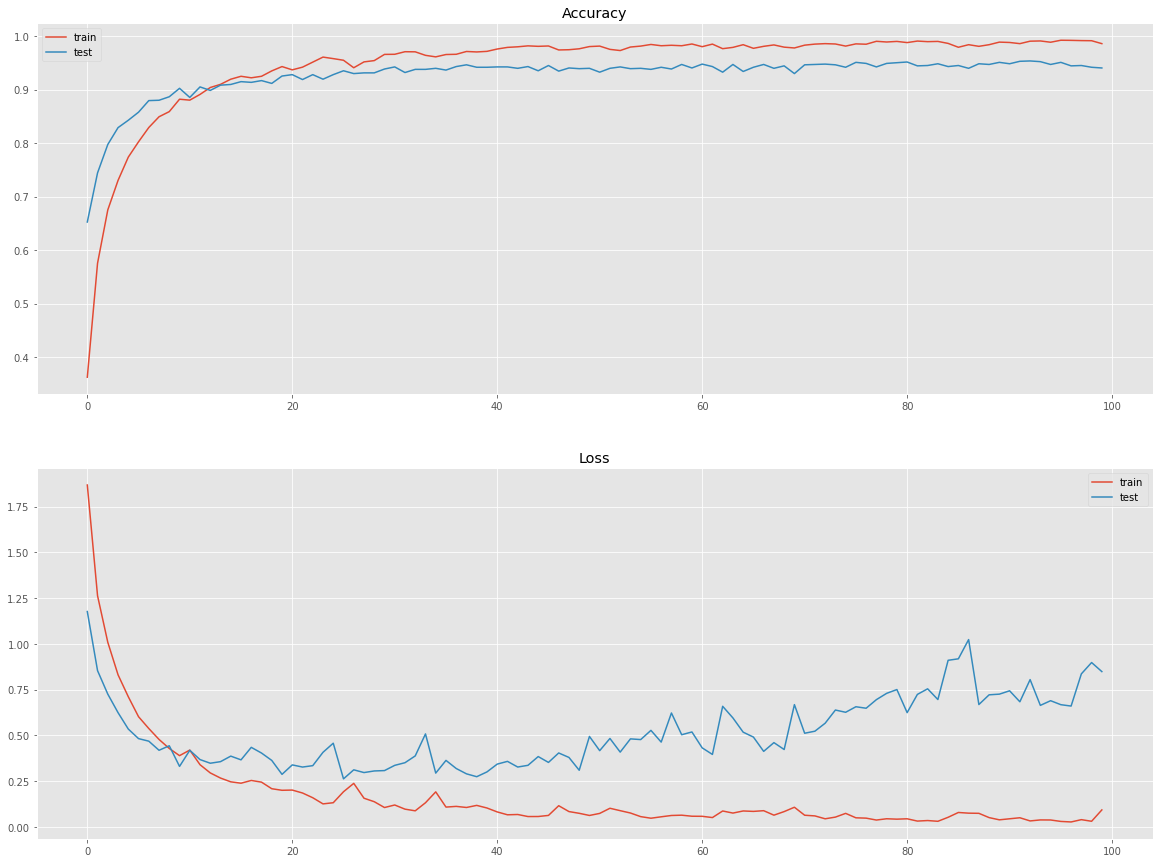

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.subplot(212)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show() 

In [27]:
predict = model.predict_classes(X_test)

c:\users\ronal\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
labels = y.columns
prediction= list()
for i in predict:
    prediction.append(labels[i])

In [29]:
k=0
for i, j in zip(class_test,prediction):
    if i==j:
        k=k+1
print(f'Accuracy on test data: {round(k/len(prediction)*100,2)}%')

Accuracy on test data: 94.03%


## AutoKeras with balanced data

In [30]:
from autokeras import StructuredDataClassifier
search = StructuredDataClassifier(max_trials=15)
# perform the search
search.fit(x=X_train, y=y_train, verbose=1)

loss, acc = search.evaluate(X_test, y_test, verbose=1)

INFO:tensorflow:Reloading Oracle from existing project .\structured_data_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\structured_data_classifier\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
143/143 [==============================] - 2s 3ms/step - loss: 1.3820 - accuracy: 0.5499
Epoch 2/20
143/143 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.8381
Epoch 3/20
143/143 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8937
Epoch 4/20
143/143 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.9201
Epoch 5/20
143/143 [==============================] - 0s 3ms/step - loss: 0.1732 - accuracy: 0.9519
Epoch 6/20
143/143 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9639
Epoch 7/20
143/143 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9738
Epoch 8/20
143/143 [==============================] - 0s 3ms/step - loss: 0.0685 - accur

In [31]:
auto_model = search.export_model()
auto_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 182)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 182)               0         
_________________________________________________________________
normalization (Normalization (None, 182)               365       
_________________________________________________________________
dense (Dense)                (None, 512)               93696     
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0     

In [32]:
autopredict = auto_model.predict(X_test)
autoprediction= list()
for i in autopredict:
    autoprediction.append(labels[i.argmax()])
k=0
for i, j in zip(class_test,autoprediction):
    if i==j:
        k=k+1
print(f'Accuracy on test data: {round(k/len(autoprediction)*100,2)}%')

Accuracy on test data: 95.28%


In this instance, using autokeras did improve our model. So we will continue with this model.

In [82]:
from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
threshold = dict()
predictions =  auto_model.predict(X_test) #change model here
for i in range(y.shape[1]):
     precision[i], recall[i], threshold[i] = precision_recall_curve(y_test.iloc[:,i], predictions[:,i])        

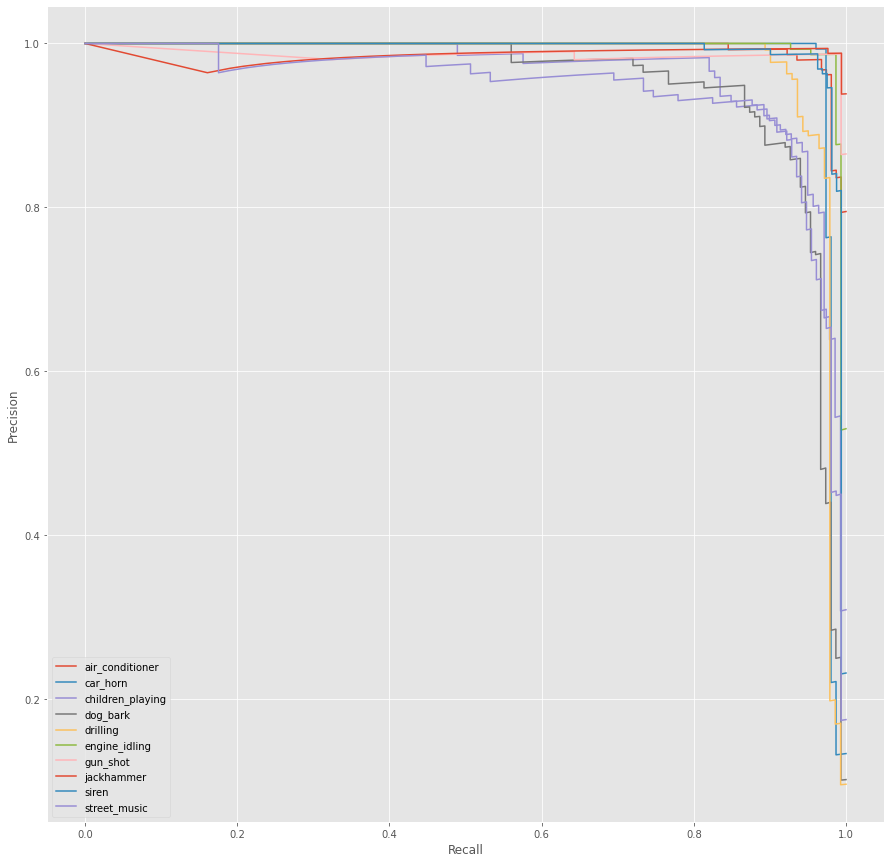

In [83]:
plt.figure(figsize=(15,15))
labels = dict()
for i, label in enumerate(y.columns):
    labels[i] = label
for i in range(10):
    plt.plot(recall[i], precision[i], label=labels[i])
    plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Choosing thresholds

Now, for each class, we are going to select the threshold that gives us the best precision/recall based on our business case.

Let's start with `air_conditioner`:

In [84]:
pr_df = pd.DataFrame()
for i in range(10):
    pr_df = pr_df.append( pd.concat([pd.Series(precision[i]), pd.Series(recall[i]), pd.Series(threshold[i]), pd.Series([i]*len(precision[i]))], axis = 1, keys = ['precision', 'recall', 'threshold', 'class']))
pr_df.reset_index(inplace=True,drop=True)
pr_df[(pr_df.precision >0.9) & (pr_df.recall > 0.84) & (pr_df['class'] ==0)].sort_values('precision', ascending=False).head(60)

,precision,recall,threshold,class
64,1.000000,0.845161,0.997372,0
51,0.993056,0.922581,0.989760,0
52,0.993007,0.916129,0.991239,0
53,0.992958,0.909677,0.991469,0
54,0.992908,0.903226,0.992521,0
55,0.992857,0.896774,0.992997,0
56,0.992806,0.890323,0.994543,0
57,0.992754,0.883871,0.994853,0
58,0.992701,0.877419,0.995122,0
59,0.992647,0.870968,0.995848,0


Here we can see that with a threshold of 0.998747, we can get 100% precision and 92.25% recall. 

Now, let's do the same for all the other classes:

In [86]:
pr_df.loc[pr_df[(pr_df['class'] ==0)].apply(lambda x: x.precision , axis=1).idxmax(), 'threshold']

0.9973724

### Thresholds for max precision
thresholds = dict()
for k,v in labels.items():
    thresholds[v] = pr_df.loc[pr_df[(pr_df['class'] ==k)].apply(lambda x: x.precision , axis=1).idxmax(), 'threshold']
print(thresholds)

In [156]:
thresholds = dict()
for k,v in labels.items():
    thresholds[v] = pr_df.loc[pr_df[(pr_df['class'] ==k)].apply(lambda x: x.precision + x.recall, axis=1).idxmax(),'threshold']
print(thresholds)

{'air_conditioner': 0.70582217, 'car_horn': 0.878067, 'children_playing': 0.29421836, 'dog_bark': 0.68255407, 'drilling': 0.69227, 'engine_idling': 0.8521776, 'gun_shot': 0.8978123, 'jackhammer': 0.32630515, 'siren': 0.89426386, 'street_music': 0.5781726}


In [159]:
predictions = auto_model.predict(X_test)
prediction_pr = list()
prediction_made = False
repeated = dict()
for number,prediction in enumerate(predictions):
    prediction_made=False
    for i,k_v in enumerate(thresholds.items()):
        if prediction[i] >= k_v[1]:
            prediction_made=True
            prediction_pr.append(k_v[0])
            repeated[number] = prediction_pr[-1]
            print(f'Observation {number} predicts: {prediction_pr[-1]}')
            
    if prediction_made == False:
            prediction_pr.append(labels[prediction.argmax()])
            print(f'Observation {number} predicts: {prediction_pr[-1]}')
            repeated[number] = prediction_pr[-1]

Observation 0 predicts: air_conditioner
Observation 1 predicts: car_horn
Observation 2 predicts: siren
Observation 3 predicts: jackhammer
Observation 4 predicts: street_music
Observation 5 predicts: jackhammer
Observation 6 predicts: engine_idling
Observation 7 predicts: children_playing
Observation 8 predicts: car_horn
Observation 9 predicts: car_horn
Observation 10 predicts: jackhammer
Observation 11 predicts: engine_idling
Observation 12 predicts: air_conditioner
Observation 13 predicts: siren
Observation 14 predicts: engine_idling
Observation 15 predicts: children_playing
Observation 16 predicts: air_conditioner
Observation 17 predicts: dog_bark
Observation 18 predicts: siren
Observation 19 predicts: gun_shot
Observation 20 predicts: siren
Observation 21 predicts: air_conditioner
Observation 22 predicts: street_music
Observation 23 predicts: gun_shot
Observation 24 predicts: jackhammer
Observation 25 predicts: car_horn
Observation 26 predicts: drilling
Observation 27 predicts: dril

In [160]:
match=0

for i, j in zip(class_test,repeated.values()):
    if i==j:
        match+=1
    
print(f'Accuracy on test data: {round(match*100/len(prediction_pr),2)}%')

Accuracy on test data: 95.1%


### Saving the best model

In [43]:
auto_model.save('urban_sound_classifier.h5')

# Conclusions

- Balancing our data gave us an accuracy improvement of roughly 3.5%
- Using Autokeras did improve our model